In [1]:
## importing required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, roc_auc_score 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\adil2\\Downloads\\ibm-hr-analytics-employee-attrition-performance\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
#Checking the dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Dataset description overall detials for numerical data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#checking null values in the dataset
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#checking counts of label column
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
le = LabelEncoder()

In [10]:
# transforming the string/objects values into numerical data using LabelEncoder
df1 =le.fit_transform(df['Attrition'])
pd.Series(df1)
df['Attrition'] = df1
df2 = le.fit_transform(df['BusinessTravel'])
pd.Series(df2)
df['BusinessTravel'] = df2
df3 = le.fit_transform(df['Department'])
pd.Series(df3)
df['Department'] = df3
df4 = le.fit_transform(df['EducationField'])
pd.Series(df4)
df['EducationField'] = df4
df5 = le.fit_transform(df['Gender'])
pd.Series(df5)
df['Gender'] = df5
df6 = le.fit_transform(df['JobRole'])
pd.Series(df6)
df['JobRole'] = df6
df7 = le.fit_transform(df['MaritalStatus'])
pd.Series(df7)
df['MaritalStatus'] = df7
df8 = le.fit_transform(df['Over18'])
pd.Series(df8)
df['Over18'] = df8
df8 = le.fit_transform(df['OverTime'])
pd.Series(df8)
df['OverTime'] = df8

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [12]:
#dropping the unwanted columns including label
x = df.drop(columns = ['Attrition','Gender','EmployeeNumber','MaritalStatus','Over18'])
y = df['Attrition']

In [13]:
x.shape

(1470, 30)

In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

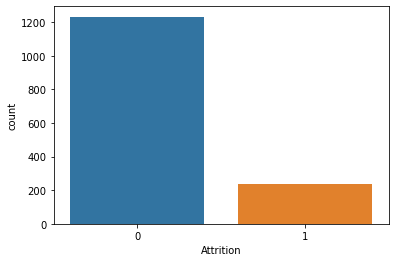

In [15]:
#plotting the graph to check the values in the attrition
sns.countplot(x = y)
plt.show()

In [16]:
#Selecting features using SelectKBest feature selection
best_features = SelectKBest(score_func = f_classif, k=20)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)

feature_scores =pd.concat([data_columns , data_scores], axis = 1)
feature_scores.columns = ['feature_Name','Score']
print(feature_scores.nlargest(20,'Score'))

                feature_Name      Score
17                  OverTime  94.656457
23         TotalWorkingYears  44.252491
11                  JobLevel  43.215344
27        YearsInCurrentRole  38.838303
14             MonthlyIncome  38.488819
0                        Age  38.175887
29      YearsWithCurrManager  36.712311
22          StockOptionLevel  28.140501
26            YearsAtCompany  27.001624
10            JobInvolvement  25.241985
13           JobSatisfaction  15.890004
8    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
12                   JobRole   6.649672
3                 Department   6.035877
25           WorkLifeBalance   6.026116
24     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
20  RelationshipSatisfaction   3.095576
16        NumCompaniesWorked   2.782287


In [17]:
#selecting the best feature from the selectKbest feature selection
x_new = x[['OverTime','TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','JobRole','Department','WorkLifeBalance','TrainingTimesLastYear','DailyRate','RelationshipSatisfaction','NumCompaniesWorked']]

In [18]:
x_new.shape

(1470, 20)

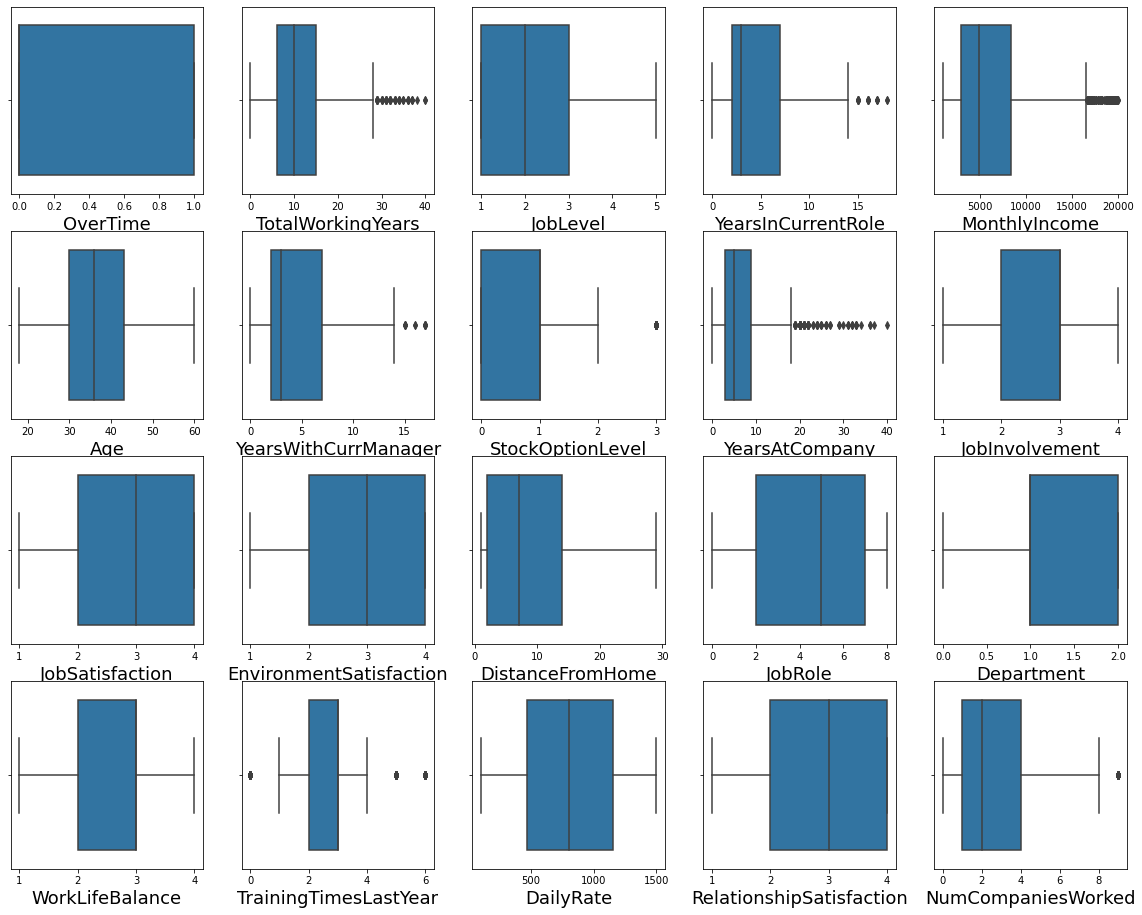

In [19]:
## plotting box plot to check the skewness and outliers in the data set
plt.figure(figsize = (20,20))
plt_num =1

for column in x_new:
    if plt_num<=20:
        sx = plt.subplot(5,5,plt_num)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 18)
    plt_num+=1
plt.show()

In [20]:
##finding the outliers 
q1 = x_new.quantile(0.25)
q3 = x_new.quantile(0.75)
iqr = q3- q1

In [21]:
iqr

OverTime                       1.0
TotalWorkingYears              9.0
JobLevel                       2.0
YearsInCurrentRole             5.0
MonthlyIncome               5468.0
Age                           13.0
YearsWithCurrManager           5.0
StockOptionLevel               1.0
YearsAtCompany                 6.0
JobInvolvement                 1.0
JobSatisfaction                2.0
EnvironmentSatisfaction        2.0
DistanceFromHome              12.0
JobRole                        5.0
Department                     1.0
WorkLifeBalance                1.0
TrainingTimesLastYear          1.0
DailyRate                    692.0
RelationshipSatisfaction       2.0
NumCompaniesWorked             3.0
dtype: float64

In [22]:
# Removing outliers in the TotalWorkingYears columns
t_w_y = (q3.TotalWorkingYears + (1.5 * iqr.TotalWorkingYears))
t_w_y

index = np.where(df['TotalWorkingYears']>t_w_y)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1403,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1404,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1405,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [23]:
# Removing outliers in the YearsInCurrentRole columns
y_c_r = (q3.YearsInCurrentRole + (1.5 * iqr.YearsInCurrentRole))
y_c_r

index = np.where(df['YearsInCurrentRole']>y_c_r)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1386,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1387,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1388,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [24]:
# Removing outliers in the MonthlyIncome columns
mi = (q3.MonthlyIncome + (1.5 * iqr.MonthlyIncome))
mi

index = np.where(df['MonthlyIncome']>mi)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1315,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1316,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1317,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [25]:
# Removing outliers in the YearsWithCurrManager columns
y_c_m = (q3.YearsWithCurrManager + (1.5 * iqr.YearsWithCurrManager))
y_c_m

index = np.where(df['YearsWithCurrManager']>y_c_m)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1307,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1308,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1309,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [26]:
# Removing outliers in the YearsAtCompany columns
y_c = (q3.YearsAtCompany + (1.5 * iqr.YearsAtCompany))
y_c

index = np.where(df['YearsAtCompany']>y_c)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1274,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1275,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1276,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [27]:
# Removing outliers in the DistanceFromHome columns
d_h = (q3.DistanceFromHome + (1.5 * iqr.DistanceFromHome))
d_h

index = np.where(df['DistanceFromHome']>d_h)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1274,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1275,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1276,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [28]:
# Removing outliers in the DailyRate columns
d_r = (q3.DailyRate + (1.5 * iqr.DailyRate))
d_r

index = np.where(df['DailyRate']>d_r)
index

df = df.drop(df.index[index])
df.shape

df.reset_index()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1465,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1274,1466,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1275,1467,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1276,1468,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [29]:
df.shape

(1278, 35)

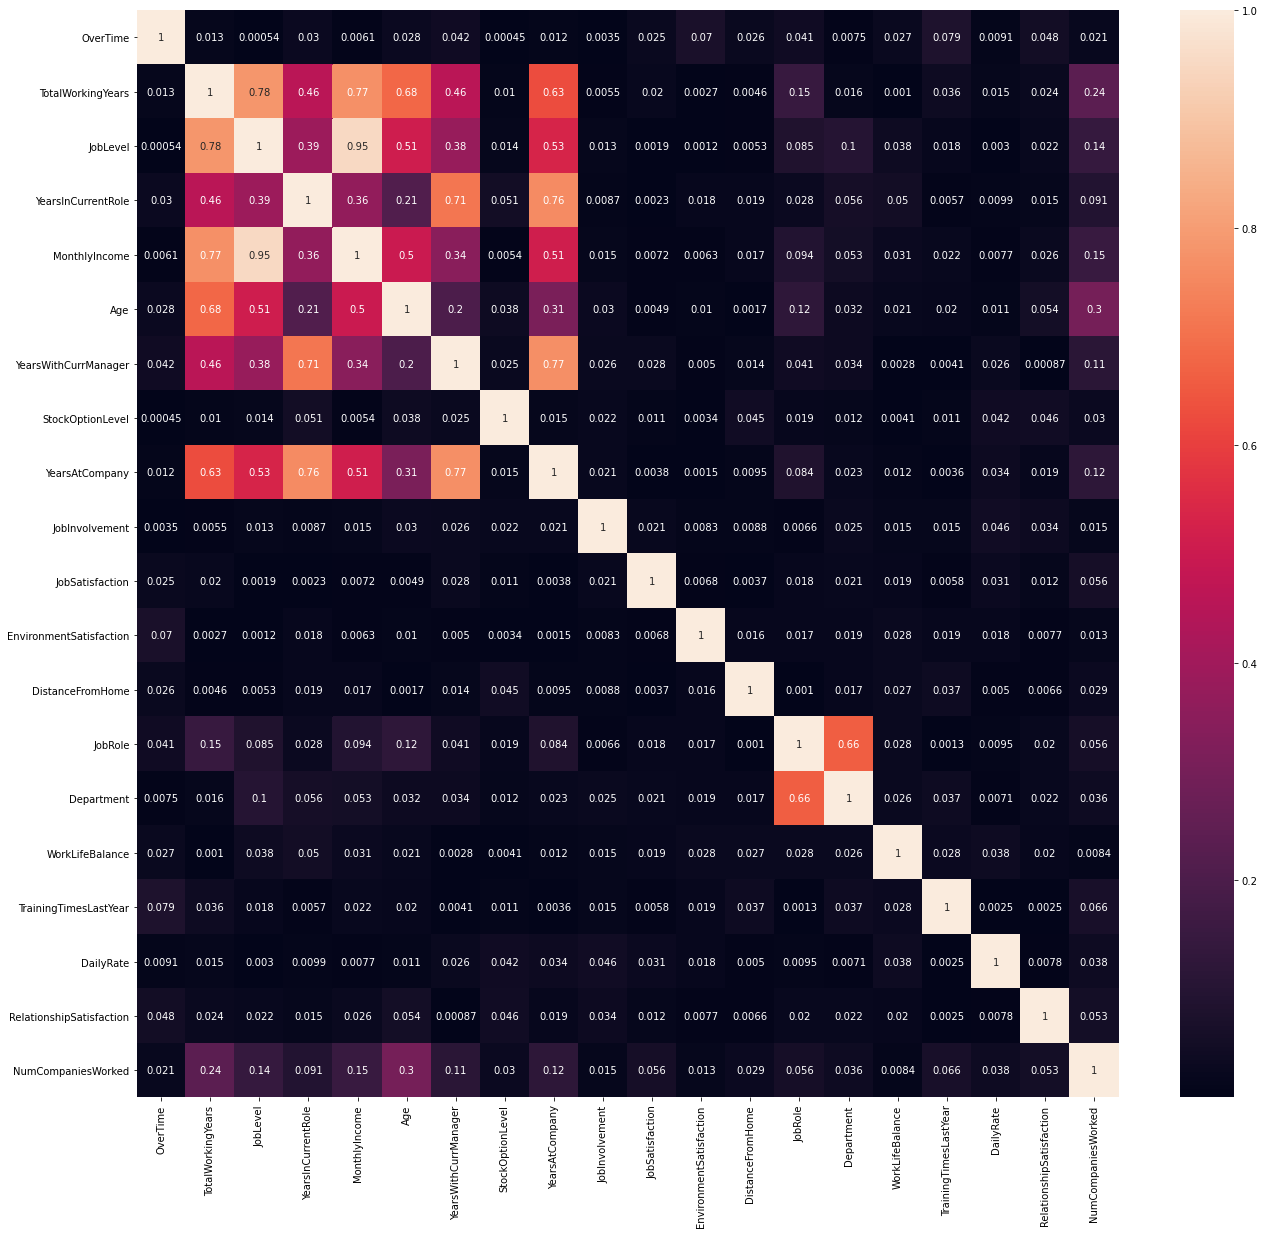

In [30]:
#finding the Co-relation between the columns using heatmap
x_corr = x_new.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(x_corr,annot = True,annot_kws = {'size':10})
plt.show()

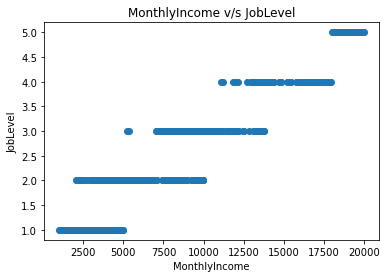

In [31]:
## plotting scatter plot to confirm co_relation between MonthlyIncome and JobLevel
plt.scatter(x_new.MonthlyIncome,x_new.JobLevel)
plt.xlabel('MonthlyIncome')
plt.ylabel('JobLevel')
plt.title('MonthlyIncome v/s JobLevel')
plt.show()

In [32]:
#dropping the joblevel column from dataset because it has huge co_variance
x_new = x_new.drop(columns = ['JobLevel'])

In [33]:
x_new.shape

(1470, 19)

In [34]:
## Transforming the dataset in standard scaler form
sc = StandardScaler()
x_sc = sc.fit_transform(x_new)

In [35]:
#splitting the dataset into train and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 355)

In [36]:
# Using KNeighborsClasssifer Algorithm for classification problem
knn = KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
#predicting the data using KNeighborsClasssifer
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[304,   3],
       [ 52,   9]], dtype=int64)

In [40]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       307
           1       0.75      0.15      0.25        61

    accuracy                           0.85       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.84      0.85      0.81       368



In [41]:
#Cross validation score 
cross_val_score(knn,x_sc,y,cv = 5)

array([0.83673469, 0.84353741, 0.8707483 , 0.84693878, 0.86054422])

In [42]:
#cross validation for cross checking the accuracy score
cross_val_score(KNeighborsClassifier(),x_sc,y,cv =5).mean()

0.8517006802721088

In [43]:
# hyperparameter tunning for model better Accuracy using GridSerachCV
param_grid = { 'algorithm' : ['kd_tree','brute'],'leaf_size' : [7,9,11,13,15],'n_neighbors' : [3,5,7,9,11,23]}

In [44]:
gri_se = GridSearchCV(estimator = knn,param_grid = param_grid)
gri_se.fit(x_train,y_train)
gri_se.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_neighbors': 5}

In [45]:
#Using kdtree for nearest neighbor with leafsize 
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 7 , n_neighbors = 5)

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=7)

In [47]:
#Predicting the values
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
#confusion matrix after hyperparameter tunning
cf = confusion_matrix(y_test,y_pred)
cf

array([[304,   3],
       [ 52,   9]], dtype=int64)

In [49]:
#Classification Report after Hyperparameter tunning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       307
           1       0.75      0.15      0.25        61

    accuracy                           0.85       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.84      0.85      0.81       368



In [50]:
# using Another algorithm for differnt results using LogisticRegression
lr = LogisticRegression()

In [51]:
lr.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
#confusion_matrix
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[302,   5],
       [ 47,  14]], dtype=int64)

In [54]:
#classification)report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       307
           1       0.74      0.23      0.35        61

    accuracy                           0.86       368
   macro avg       0.80      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368



In [55]:
# We used both Algorithm 

# For KNeighborsClasssifer it gives 85% Accuracy
# For LogisticRegression it gives 86% Accuracy